# Python 零售銀行機器學習

> 機器學習的資料表示

[郭耀仁](https://hahow.in/@tonykuoyj?tr=tonykuoyj) | yaojenkuo@ntu.edu.tw

## 什麼是機器學習

## 機器學習的三個要素、一個但書

> A computer program is said to learn from experience E with respect to some class of tasks T and performance measure P if its performance at tasks in T, as measured by P, improves with experience E.

來源：[Machine Learning, Tom Mitchell, McGraw Hill, 1997](http://www.cs.cmu.edu/~tom/mlbook.html)

## 傳統透過電腦程式解決問題的方式示意圖

![Imgur](https://i.imgur.com/3pojPXW.png?1)

來源：<https://www.coursera.org/learn/introduction-tensorflow>

## 給定規則 $w$ 以及資料 $X$，我們就可以定義出函數 $f$ 生成答案 $y$

\begin{equation}
y = f(X;w) = Xw
\end{equation}

## 以機器學習的電腦程式解決問題的方式示意圖

![Imgur](https://i.imgur.com/YunyLd7.png)

來源：<https://www.coursera.org/learn/introduction-tensorflow>

## 給定答案 $y$ 以及資料 $X$，機器學習的電腦程式在最小化損失函數 $J$ 的前提下生成規則 $w$，進而獲得預測 $\hat{y}$

\begin{equation}
\text{choose} \; w \in \{w^1, w^2, ..., w^n\} \\
\text{where} \; w \; \text{minimizes} \; J(w) \\
\text{subject to} \; \hat{y} = h(X; w) = Xw \\
\text{where} \; J(w) \; \text{measures the loss between} \; y \; \text{and} \; \hat{y} \\
\end{equation}

## 預測數值時最常見的損失函數 $J$

最小化均方誤差（Mean squared error）。

\begin{align}
\operatorname*{arg\,min}_w \;  J(w) =  \frac{1}{m} \sum_i^m (y_i - \hat{y_i})^2
\end{align}

## 預測類別時最常見的損失函數 $J$

最小化預測錯誤個數。

\begin{align}
\operatorname*{arg\,min}_w \; J(w) = \sum_j n(E_j) \\ \text{ where } E_j \; \text{represents the occurrence of } y_j \neq \hat{y_j}
\end{align}

## 機器學習的資料表示

## 特徵矩陣與目標陣列

- 外型 `(m, n)` 的特徵矩陣 $X$
- 外型 `(m,)` 的目標陣列 $y$

In [1]:
import matplotlib.pyplot as plt

def plot_X_y():
    fig = plt.figure(figsize=(6, 4))
    ax = fig.add_axes([0, 0, 1, 1])
    ax.axis('off')
    ax.axis('equal')
    # Draw features matrix
    ax.vlines(range(6), ymin=0, ymax=9, lw=1)
    ax.hlines(range(10), xmin=0, xmax=5, lw=1)
    font_prop = dict(size=12, family='monospace')
    ax.text(-1, -1, "Feature Matrix ($X$)", size=14)
    ax.text(0.1, -0.3, r'n_features $\longrightarrow$', **font_prop)
    ax.text(-0.1, 0.1, r'$\longleftarrow$ m_samples', rotation=90,
            va='top', ha='right', **font_prop)
    # Draw labels vector
    ax.vlines(range(8, 10), ymin=0, ymax=9, lw=1)
    ax.hlines(range(10), xmin=8, xmax=9, lw=1)
    ax.text(7, -1, "Target Array ($y$)", size=14)
    ax.text(7.9, 0.1, r'$\longleftarrow$ m_samples', rotation=90,
            va='top', ha='right', **font_prop)
    ax.set_ylim(10, -2)
    plt.show()

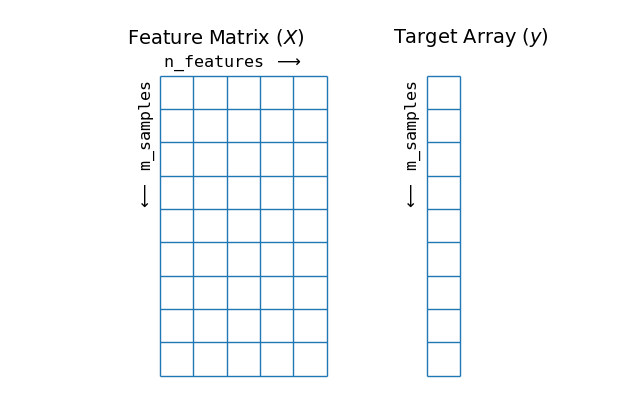

In [2]:
# 來源：<https://jakevdp.github.io/PythonDataScienceHandbook>
plot_X_y()

## 如何從 `DataFrame` 中擷取特徵矩陣與目標陣列

In [3]:
import pandas as pd

csv_url = "https://raw.githubusercontent.com/datainpoint/classroom-python-for-finance-2025/refs/heads/main/ames/train.csv"
ames_train = pd.read_csv(csv_url) # import data
print(type(ames_train))
print(ames_train.shape)

<class 'pandas.core.frame.DataFrame'>
(1460, 81)


## Kaggle Ames Housing dataset

來源：<https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques>

In [4]:
ames_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## 數值欄位的描述性統計

In [5]:
ames_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## 數值欄位一覽

In [6]:
numeric_columns = ames_train.describe().columns
print(numeric_columns)

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


## 選擇一個欄位作為特徵矩陣

In [7]:
X = ames_train["OverallQual"].values.reshape(-1, 1) # select 1 column
y = ames_train["SalePrice"].values                  # select 1 column
print(X.shape)
print(y.shape)

(1460, 1)
(1460,)


## 選擇兩個以上欄位作為特徵矩陣

In [8]:
X = ames_train[["OverallQual", "TotRmsAbvGrd"]].values # select 2 columns
y = ames_train["SalePrice"].values                     # select 1 column
print(X.shape)
print(y.shape)

(1460, 2)
(1460,)
